In [3]:
#Import Dependancies 

#Model
import keras
import tensorflow as tf
from sklearn.manifold import TSNE

#Data
import numpy as np

#Visualisation
import matplotlib
import matplotlib.pyplot as plt


sample_data/


In [2]:
#Hyper-params

vocab_size = 74
MAX_LENGTH = 290
embedding_size = vocab_size
encoding_size = 350
topic_dataset = True
topic = "blm" #or "brexit" or "covid"

In [4]:
#Load data

%cd Embeddings/

if topic_dataset == False:

  x = np.load("x_embeddings.npy")
  y = np.load("y_embeddings.npy")


else:
  if topic == "covid":
    x = np.load("covid_x_embeddings.npy")
    y = np.load("covid_y_embeddings.npy") 
  if topic == "blm":
    x = np.load("blm_x_embeddings.npy")
    y = np.load("blm_y_embeddings.npy") 
  if topic == "brexit":
    x = np.load("brexit_x_embeddings.npy")
    y = np.load("brexit_y_embeddings.npy") 




print("Loaded", (len(x)), "samples")

[Errno 2] No such file or directory: 'Embeddings/'
/content


FileNotFoundError: ignored

In [ ]:
print(x[0].shape)
print(y.shape)

(350,)
(4940, 3)


In [ ]:
#Run t-SNE
tsne = TSNE(n_components = 2, verbose = 2, perplexity= 10, n_iter= 5500, random_state = 0)

x_embedded = tsne.fit_transform(x)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4940 samples in 0.162s...
[t-SNE] Computed neighbors for 4940 samples in 8.914s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4940
[t-SNE] Computed conditional probabilities for sample 2000 / 4940
[t-SNE] Computed conditional probabilities for sample 3000 / 4940
[t-SNE] Computed conditional probabilities for sample 4000 / 4940
[t-SNE] Computed conditional probabilities for sample 4940 / 4940
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.139s
[t-SNE] Iteration 50: error = 92.1461029, gradient norm = 0.0411574 (50 iterations in 1.818s)
[t-SNE] Iteration 100: error = 77.2630310, gradient norm = 0.0187224 (50 iterations in 1.384s)
[t-SNE] Iteration 150: error = 72.1994324, gradient norm = 0.0131163 (50 iterations in 1.316s)
[t-SNE] Iteration 200: error = 69.2948227, gradient norm = 0.0099079 (50 iterations in 1.291s)
[t-SNE] Iteration 250: error = 67.2949448, gradient norm = 0.0106743

In [ ]:
x_co_ord = []
y_co_ord = []

#define co-ordinates for visualisation
for i in x_embedded:
  x_co_ord.append(i[0])
  y_co_ord.append(i[1])

In [ ]:
#convert label categotical --> numerical
labels = []

for i in y:
  labels.append(np.argmax(i))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support '#DC241f' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support '#0087DC' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support '#FFFF00' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """


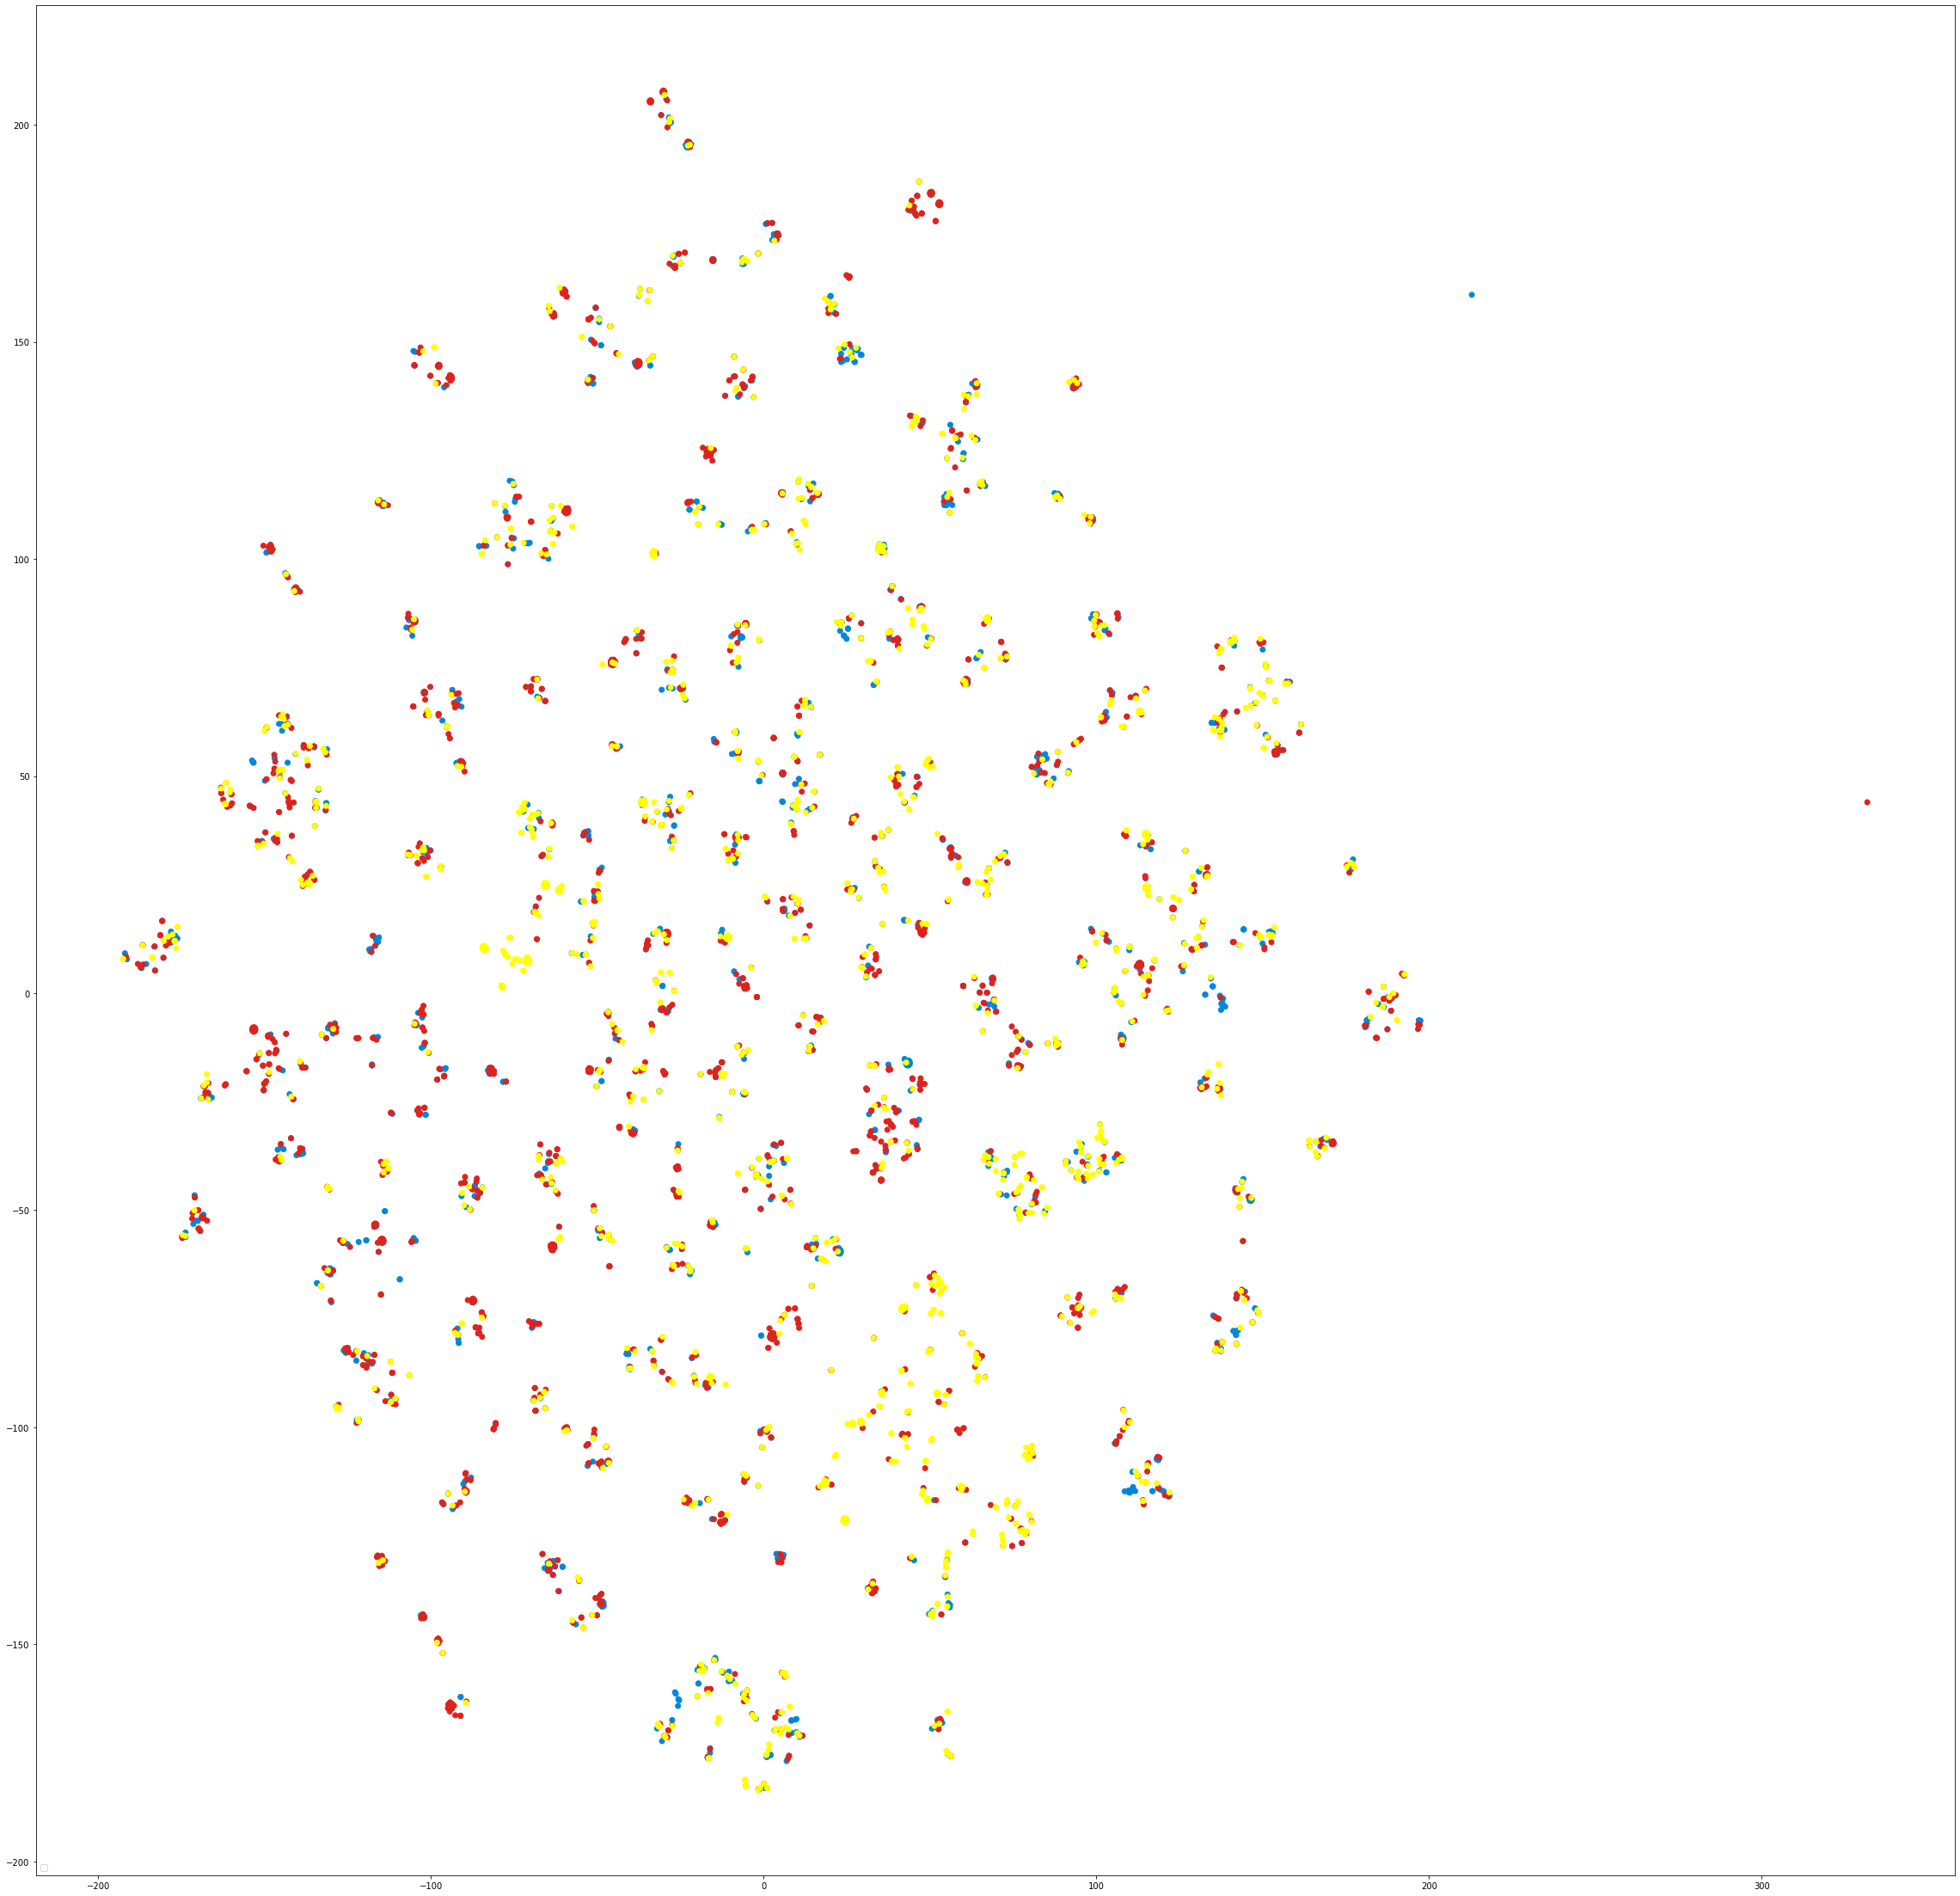

In [ ]:
#visualise embeddings
colors = ['#DC241f','#0087DC','#FFFF00']

fig = plt.figure(figsize=(40,40))
plt.scatter(x_co_ord, y_co_ord, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(colors,labels,loc=3)